In [694]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [695]:
df1 = pd.read_csv("vericsv.csv")
df2 = pd.read_csv("veri2csv.csv")
df3 = pd.read_csv("veri3csv.csv")
df4 = pd.read_csv("veri5csv.csv")


In [696]:
df = pd.merge(df1,df2,how='outer',on=None,left_on=None,right_on=None,
         left_index=False,right_index=False,sort=True)
df = pd.merge(df,df3,how='outer',on=None,left_on=None,right_on=None,
         left_index=False,right_index=False,sort=True)
df = pd.merge(df,df4,how='outer',on=None,left_on=None,right_on=None,
         left_index=False,right_index=False,sort=True)


In [697]:
df.head()

,Meslek,Şehir,Nitelikler
0,.Net Developer,İstanbul,Genel Özellikler Kurumsal uygulamalar gelişt...
1,.Net Developer,İstanbul(Avr.)(Avcılar),GENEL NİTELİKLER VE İŞ TANIMI Genel Özellikle...
2,.Net Yazılım Geliştirme Uzmanı,Bursa,
3,.Net Yazılım Geliştirme Uzmanı,Bursa(Nilüfer),Mühendisliği veya ilgili Mühendislik bölümleri...
4,.Net Yazılım Mühendisi,İstanbul,


In [408]:
df.shape

(392, 3)

In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Meslek      392 non-null    object
 1   Şehir       365 non-null    object
 2   Nitelikler  365 non-null    object
dtypes: object(3)
memory usage: 12.2+ KB


##### Makine öğrenmesi süresi olmayacağı için kayıp verileri dikkate almıyorum. 

# Şehirlere Göre İş İlanı Dağılımı

##### Şehir gözleminde yer alana (Avr)-Nilüfer gibi ifadeleri ayıralım.

In [699]:
df['Şehir'],df['İlçe'] = df['Şehir'].str.split('(', 1).str

##### Tek satırda yazan iki şehirleri de ayırarak "İl" isminde yeni bir gözlem birimi oluşturalım.

In [700]:
df["İl"] = df["Şehir"].str.split(",").str[-1]
# İllerin başında sonunda boşluk kaldıysa onları kaldırıyoruz.
df["İl"] = df["İl"].str.replace(' ','')

In [701]:
il_sayisi = df.İl.value_counts()

In [702]:
df_il = pd.Series.to_frame(il_sayisi).reset_index()
df_il.columns = ["Şehir","Sayı"]
df_il.head()

,Şehir,Sayı
0,İstanbul,206
1,Ankara,48
2,,46
3,Kocaeli,13
4,Bursa,11


###### Boş satırı silelim.

In [703]:
df_il.drop(df_il[df_il.Şehir == ""].index, inplace=True)

In [704]:
df_il.shape

(21, 2)

In [705]:
df_il.head()

,Şehir,Sayı
0,İstanbul,206
1,Ankara,48
3,Kocaeli,13
4,Bursa,11
5,İzmir,8


##### Sonuç olarak şehir belirtilmiş 365 iş ilanı arasında 21 farklı şehir bulunmaktadır.

## İş ilanlarının şehirlere göre dağılımını görselleştirelim.

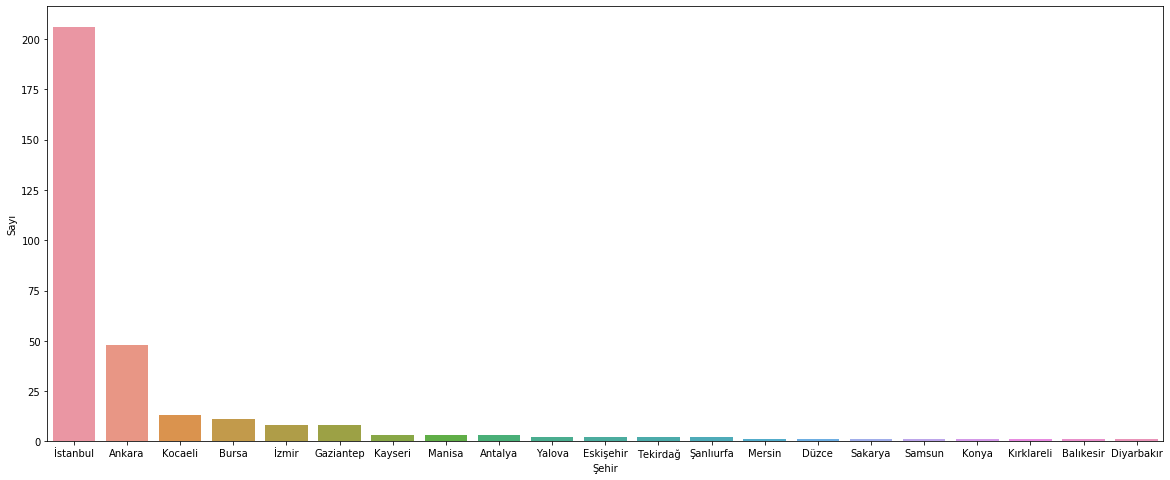

In [706]:
plt.figure(figsize=(20,8))
sns.barplot(x = "Şehir" , y = "Sayı" , data = df_il)

In [707]:
populer_il = df_il[(df_il.Sayı > 4)]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026252DD0DC8>],
      dtype=object)

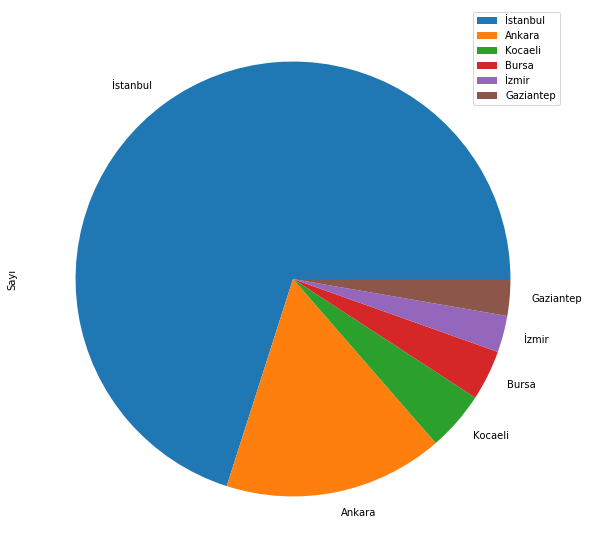

In [708]:
populer_il.plot.pie(y='Sayı', subplots=True, labels=populer_il["Şehir"] ,figsize=(10, 10))

# En Çok Talep Edilen Programlama Dilleri
##### Script ve Markup dilleriyle birlikte

In [709]:
programlama_dilleri_listesi = ['go','r','python', 'java', 'c++','html','css', 'php', 
                            'javascript', 'objective-c', 'ruby', 'perl','c#','kotlin','c', 
                           'dart','lisp','sql','powershell','bash','shell','typescript','assembly','swift',
                      'scala','rust','elixir','clojure','webassembly','f#','erlang'
                              ]

In [710]:
nitelikler = df['Nitelikler'].tolist()
nitelikler_string = ''.join(map(str, nitelikler)).lower()

In [711]:
import re
programlama_dilleri = dict((keys,0) for keys in programlama_dilleri_listesi)
for w in re.findall(r"[\w'+#-]+|[.!?;’]", nitelikler_string):
    if w in programlama_dilleri:
        programlama_dilleri[w] += 1

print(programlama_dilleri)

{'go': 1, 'r': 8, 'python': 14, 'java': 49, 'c++': 21, 'html': 31, 'css': 31, 'php': 14, 'javascript': 59, 'objective-c': 4, 'ruby': 0, 'perl': 1, 'c#': 58, 'kotlin': 7, 'c': 26, 'dart': 0, 'lisp': 0, 'sql': 103, 'powershell': 1, 'bash': 4, 'shell': 1, 'typescript': 5, 'assembly': 0, 'swift': 7, 'scala': 1, 'rust': 0, 'elixir': 0, 'clojure': 0, 'webassembly': 0, 'f#': 0, 'erlang': 0}


In [712]:
diller_df = pd.DataFrame(programlama_dilleri.items(),columns = ['Dil','Popülerlik'])
diller_df = diller_df.sort_values(by='Popülerlik', ascending=False)

In [713]:
diller_df.head(10)

,Dil,Popülerlik
17,sql,103
8,javascript,59
12,c#,58
3,java,49
5,html,31
6,css,31
14,c,26
4,c++,21
7,php,14
2,python,14


#### Bar Plot

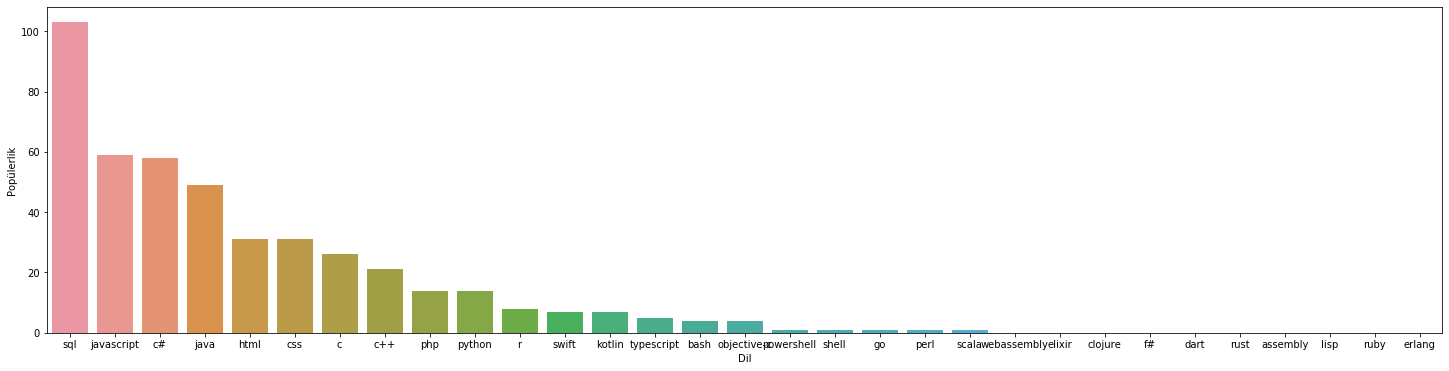

In [714]:
plt.figure(figsize=(25,6))
sns.barplot(x = "Dil" , y = "Popülerlik"  , data = diller_df )

#### Pie Chart

In [715]:
en_populer = diller_df[(diller_df.Popülerlik > 10)]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000262533643C8>],
      dtype=object)

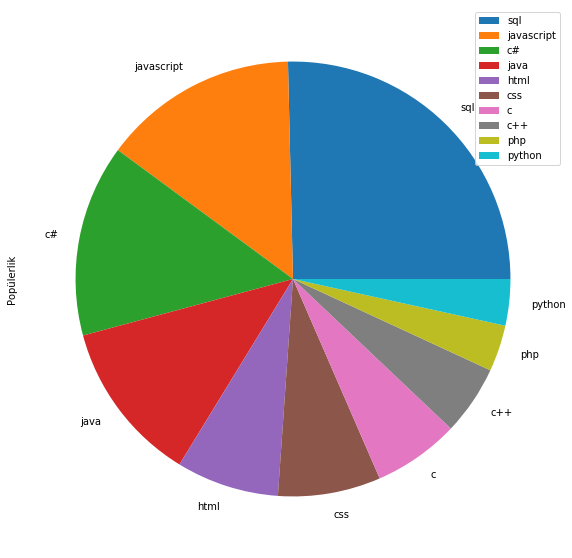

In [716]:
en_populer.plot.pie(y='Popülerlik', labels=en_populer["Dil"],subplots=True,figsize=(10, 10))

#### WordCloud

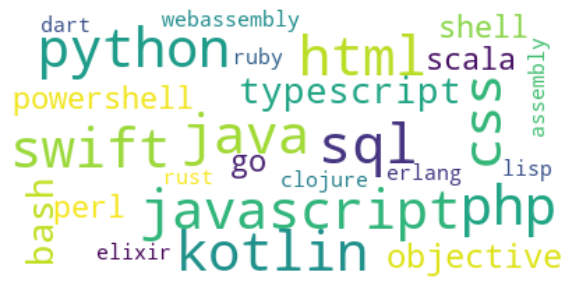

In [717]:
text = " ".join(i for i in diller_df.Dil)
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size = 40, 
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


## En Çok Talep Edilen Framework'ler

In [718]:
framework_listesi = ['.net','core','jquery','react.js','angular','asp.net','express','spring','vue.js',\
                     'vue','django','flask','laravel','ruby on rails','drupal','node.js',\
                     'pandas','unity','react','tensorflow','ansible','cordova','xamarin','spark','hadoop']                  
    


In [719]:
frameworks = dict((keys,0) for keys in framework_listesi)
for w in re.findall(r"[\w'+#-.]+|[.!?;’]", nitelikler_string):
    if w in frameworks:
        frameworks[w] += 1

print(frameworks)

{'.net': 53, 'core': 12, 'jquery': 13, 'react.js': 4, 'angular': 8, 'asp.net': 38, 'express': 0, 'spring': 8, 'vue.js': 0, 'vue': 1, 'django': 2, 'flask': 0, 'laravel': 0, 'ruby on rails': 0, 'drupal': 0, 'node.js': 4, 'pandas': 0, 'unity': 1, 'react': 5, 'tensorflow': 1, 'ansible': 0, 'cordova': 2, 'xamarin': 3, 'spark': 0, 'hadoop': 0}


In [720]:
framework_df = pd.DataFrame(frameworks.items(),columns = ['Framework','Popülerlik'])
framework_df = framework_df.sort_values(by='Popülerlik', ascending=False)

###### 0 kez geçmiş olanları silelim.

In [721]:
framework_df.drop(framework_df[framework_df.Popülerlik < 1].index, inplace=True)

#### Bar Plot

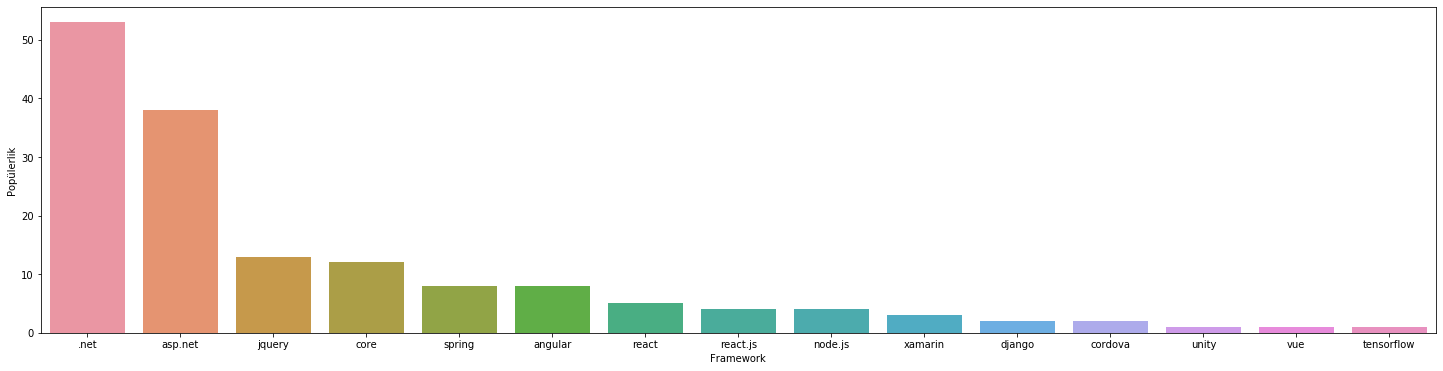

In [723]:
plt.figure(figsize=(25,6))
sns.barplot(x = "Framework" , y = "Popülerlik"  , data = framework_df )

#### Pie Chart

In [724]:
populer_framework = framework_df[(framework_df.Popülerlik > 5)]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026253738688>],
      dtype=object)

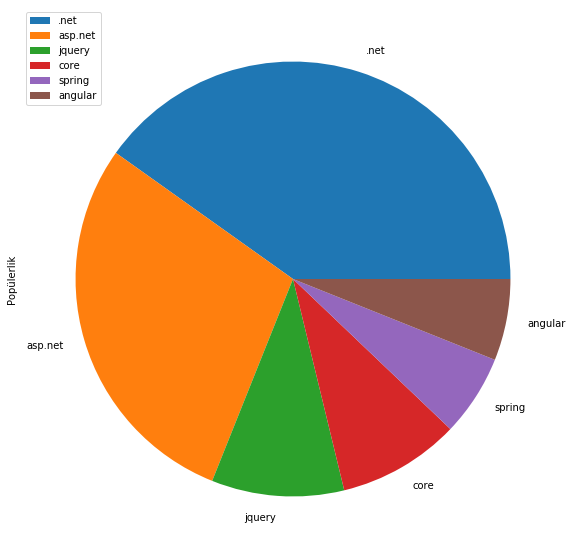

In [725]:
populer_framework.plot.pie(y='Popülerlik', labels=populer_framework["Framework"],subplots=True,figsize=(10, 10))

## Talep Edilen Veri Tabanları

In [726]:
veritabani_listesi = ['mysql','postgresql','mssql','sqlite','mongodb','redis','mariadb',\
                     'oracle','elasticsearch','firebase','dynamodb']
                                        

In [727]:
veritabanlari = dict((keys,0) for keys in veritabani_listesi)
for w in re.findall(r"[\w'+#-.]+|[.!?;’]", nitelikler_string):
    if w in veritabanlari:
        veritabanlari[w] += 1

print(veritabanlari)

{'mysql': 8, 'postgresql': 3, 'mssql': 16, 'sqlite': 0, 'mongodb': 3, 'redis': 0, 'mariadb': 0, 'oracle': 14, 'elasticsearch': 1, 'firebase': 0, 'dynamodb': 0}


In [728]:
veritabani_df = pd.DataFrame(veritabanlari.items(),columns = ['Veritabanı','Popülerlik'])
veritabani_df = veritabani_df.sort_values(by='Popülerlik', ascending=False)

###### 0 kez geçmiş olanları silelim.

In [729]:
veritabani_df.drop(veritabani_df[veritabani_df.Popülerlik < 1].index, inplace=True)

#### Bar Plot

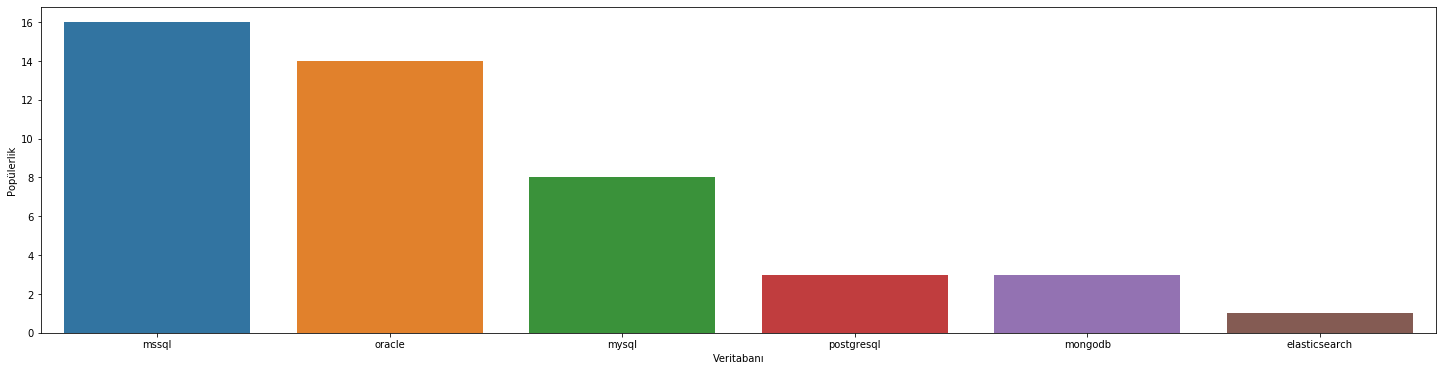

In [730]:
plt.figure(figsize=(25,6))
sns.barplot(x = "Veritabanı" , y = "Popülerlik"  , data = veritabani_df )

#### Pie Chart

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000262537FA9C8>],
      dtype=object)

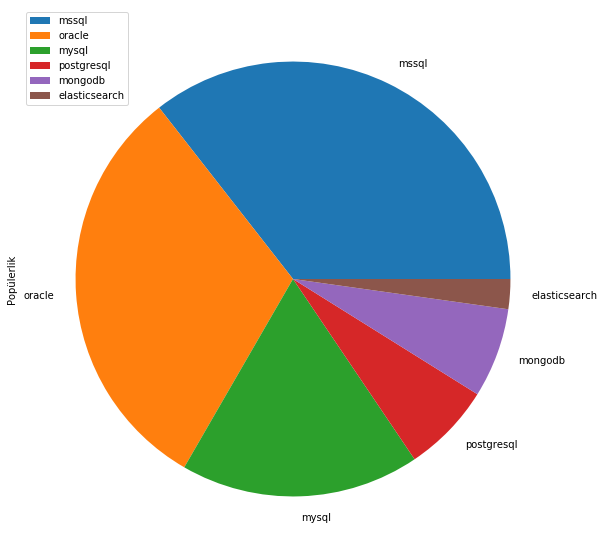

In [731]:
veritabani_df.plot.pie(y='Popülerlik', labels=veritabani_df["Veritabanı"],subplots=True,figsize=(10, 10))

## Firmalar kaç yıl tecrübe talep ediyor ?

In [732]:
from collections import defaultdict

deneyim_yil = defaultdict(lambda: 0)
for w in re.findall(r'([0-9]+) yıl', nitelikler_string):
     deneyim_yil[w] += 1
        
print(deneyim_yil)


defaultdict(<function <lambda> at 0x0000026253D44828>, {'3': 62, '4': 25, '1': 6, '2': 70, '5': 31, '2001': 6, '2019': 7, '20': 7, '2010': 1, '2017': 1, '7': 7, '1982': 1, '8': 1, '2005': 1, '10': 4, '1986': 1, '2008': 1, '1997': 1, '41': 2})


In [733]:
deneyim_df = pd.DataFrame.from_dict(deneyim_yil, orient='index').sort_values(by=0,ascending=False).reset_index()
deneyim_df.columns=['Tecrübe', 'Sayı']
deneyim_df = deneyim_df.sort_values(by='Sayı', ascending=False)

###### Tecrübe yıllarını "sayı+yıl" şeklinde aldık. Fakat tecrübe haricinde "sayı+yıl" şeklinde geçen başka sayılarda olduğu için
###### tecrübe yılını en fazla 5 yıl olarak belirliyoruz.

In [734]:
deneyim_df["Tecrübe"] = deneyim_df["Tecrübe"].astype(int)

In [735]:
deneyim_df.drop(deneyim_df[deneyim_df.Tecrübe > 5 ].index, inplace=True)

In [736]:
deneyim_df

,Tecrübe,Sayı
0,2,70
1,3,62
2,5,31
3,4,25
7,1,6


#### Bar Plot

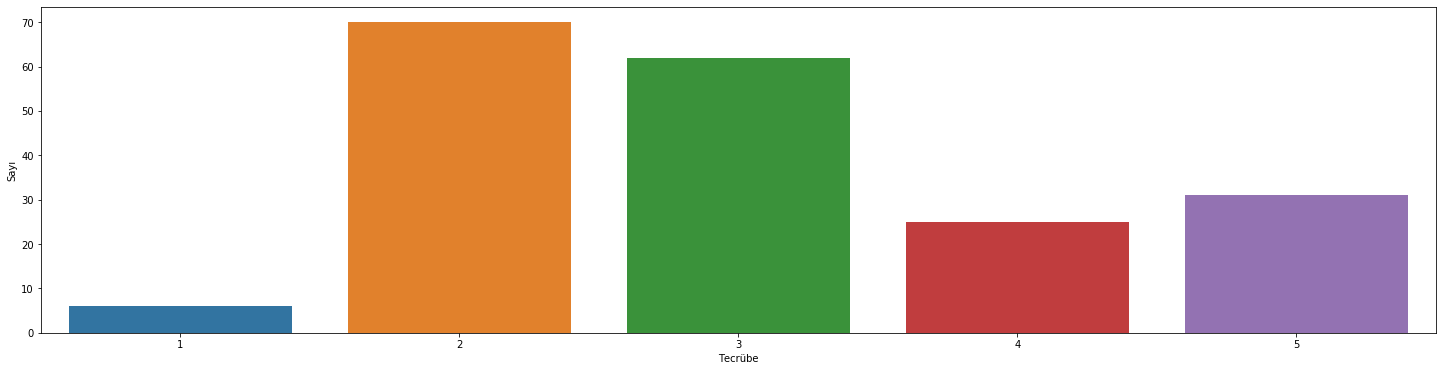

In [737]:
plt.figure(figsize=(25,6))
sns.barplot(x = "Tecrübe" , y = "Sayı"  , data = deneyim_df )

#### Pie Chart

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000262533EEFC8>],
      dtype=object)

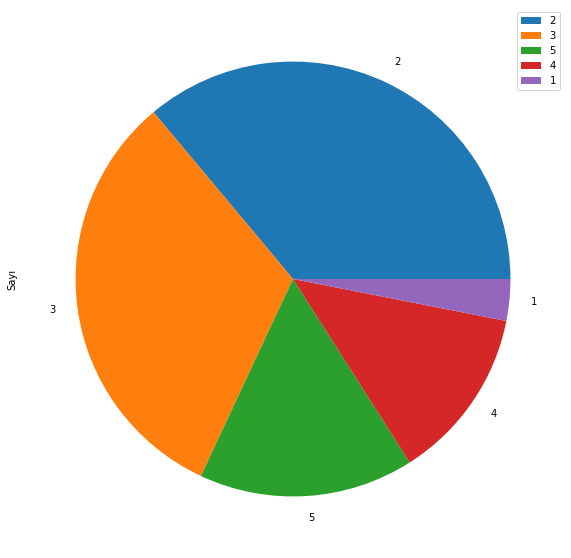

In [738]:
deneyim_df.plot.pie(y='Sayı', labels=deneyim_df["Tecrübe"],subplots=True,figsize=(10, 10))

## Hangi platformlar(masaüstü-web-mobil) daha çok talep ediliyor?

In [739]:
platform_listesi = ['web','mobil','android','ios','masaüstü']

In [740]:
platformlar = dict((keys,0) for keys in platform_listesi)
for w in re.findall(r"[\w'+#-.]+|[.!?;’]", nitelikler_string):
    if w in platformlar:
        platformlar[w] += 1

print(platformlar)

{'web': 137, 'mobil': 55, 'android': 22, 'ios': 15, 'masaüstü': 4}


In [741]:
platform_df = pd.DataFrame.from_dict(platformlar, orient='index').sort_values(by=0,ascending=False).reset_index()
platform_df.columns=['Platform', 'Sayı']


In [742]:
platform_df.head()

,Platform,Sayı
0,web,137
1,mobil,55
2,android,22
3,ios,15
4,masaüstü,4


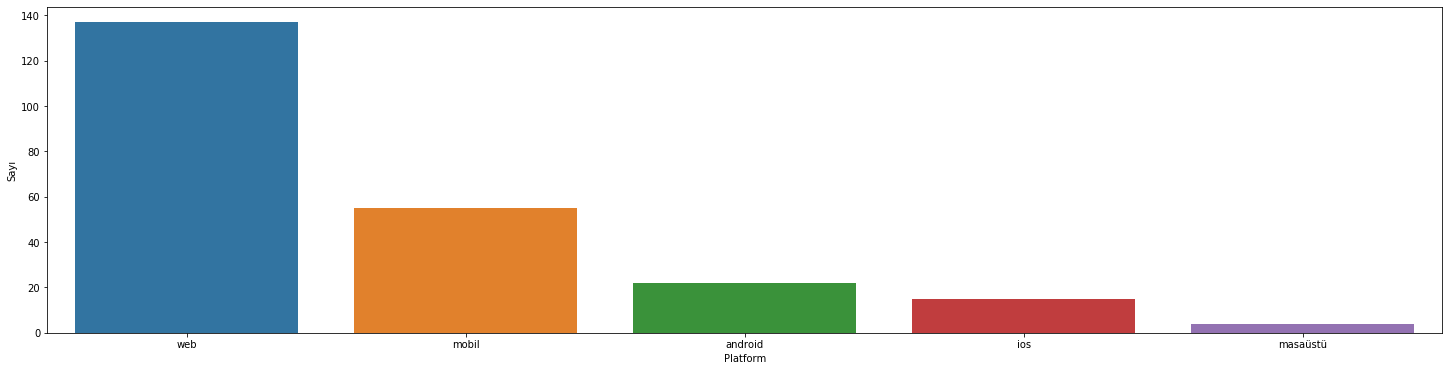

In [744]:
plt.figure(figsize=(25,6))
sns.barplot(x = "Platform" , y = "Sayı"  , data = platform_df )